In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

In [2]:
nba_initial = pd.read_csv('cleaned.csv', index_col=[0])
nba_initial

,playerName,seasonStartYear,salary,inflationAdjSalary,birthDate,startYear,position,height,weight,MP,...,FTr,AST,STL,TRB,FT,3P,FG,position_enc,team_enc,height_enc
0,Michael Jordan,1996,"$30,140,000","$52,258,566",1963-02-17,1985.0,G-F,6-6,198.0,3090.0,...,0.355,352.0,180.0,543.0,548.0,111.0,916.0,6,5,14
1,Horace Grant,1996,"$14,857,000","$25,759,971",1965-07-04,1988.0,F-C,6-10,215.0,2286.0,...,0.306,170.0,62.0,580.0,152.0,1.0,347.0,3,26,8
2,Reggie Miller,1996,"$11,250,000","$19,505,934",1965-08-24,1988.0,G-F,6-7,185.0,2621.0,...,0.467,253.0,77.0,214.0,430.0,168.0,504.0,6,13,15
3,Shaquille O'Neal,1996,"$10,714,000","$18,576,585",1972-03-06,1993.0,C,7-1,325.0,1946.0,...,0.495,155.0,34.0,596.0,249.0,1.0,592.0,0,26,19
4,Gary Payton,1996,"$10,212,000","$17,706,187",1968-07-23,1991.0,G,6-4,180.0,3162.0,...,0.240,608.0,231.0,339.0,229.0,98.0,618.0,5,32,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10487,Marcus Thornton II,2017,"$46,079","$51,109",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,-1,-1
10488,Jameel Warney,2017,"$46,079","$51,109",1994-01-31,2018.0,F,6-8,260.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,-1,16
10489,Aaron Jackson,2017,"$46,079","$51,109",1986-05-06,2018.0,G,6-4,185.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,-1,12
10490,Trey McKinney-Jones,2017,"$46,079","$51,109",1990-08-27,2018.0,G,6-5,214.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,-1,13


In [3]:
nba = nba_initial.dropna()
nba

,playerName,seasonStartYear,salary,inflationAdjSalary,birthDate,startYear,position,height,weight,MP,...,FTr,AST,STL,TRB,FT,3P,FG,position_enc,team_enc,height_enc
0,Michael Jordan,1996,"$30,140,000","$52,258,566",1963-02-17,1985.0,G-F,6-6,198.0,3090.0,...,0.355,352.0,180.0,543.0,548.0,111.0,916.0,6,5,14
1,Horace Grant,1996,"$14,857,000","$25,759,971",1965-07-04,1988.0,F-C,6-10,215.0,2286.0,...,0.306,170.0,62.0,580.0,152.0,1.0,347.0,3,26,8
2,Reggie Miller,1996,"$11,250,000","$19,505,934",1965-08-24,1988.0,G-F,6-7,185.0,2621.0,...,0.467,253.0,77.0,214.0,430.0,168.0,504.0,6,13,15
3,Shaquille O'Neal,1996,"$10,714,000","$18,576,585",1972-03-06,1993.0,C,7-1,325.0,1946.0,...,0.495,155.0,34.0,596.0,249.0,1.0,592.0,0,26,19
4,Gary Payton,1996,"$10,212,000","$17,706,187",1968-07-23,1991.0,G,6-4,180.0,3162.0,...,0.240,608.0,231.0,339.0,229.0,98.0,618.0,5,32,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10461,Adreian Payne,2017,"$77,250","$85,683",1991-02-19,2015.0,F-C,6-10,237.0,135.0,...,0.352,7.0,8.0,33.0,14.0,3.0,23.0,3,19,8
10465,James Young,2017,"$77,250","$85,683",1995-08-16,2015.0,G-F,6-6,215.0,220.0,...,0.155,4.0,10.0,26.0,6.0,12.0,25.0,6,1,14
10471,Darrun Hilliard,2017,"$77,250","$85,683",1993-04-13,2016.0,G,6-6,205.0,381.0,...,0.222,33.0,11.0,33.0,21.0,12.0,47.0,5,10,14
10481,Jonathan Gibson,2017,"$74,158","$82,253",1987-11-08,2017.0,G,6-2,185.0,231.0,...,0.305,26.0,8.0,22.0,21.0,15.0,35.0,5,8,10


In [4]:
nba['inflationAdjSalary'] = nba['inflationAdjSalary'].str.replace('$', '')
nba['inflationAdjSalary'] = nba['inflationAdjSalary'].str.replace(',', '')
nba['inflationAdjSalary'] = nba['inflationAdjSalary'].astype(int)
nba['inflationAdjSalary_log'] = nba['inflationAdjSalary'].apply(lambda x: np.log(x))
nba

/var/folders/2w/dyfxg9ln5k96swfq48d47ppc0000gn/T/ipykernel_51624/703286028.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  nba['inflationAdjSalary'] = nba['inflationAdjSalary'].str.replace('$', '')
/var/folders/2w/dyfxg9ln5k96swfq48d47ppc0000gn/T/ipykernel_51624/703286028.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nba['inflationAdjSalary'] = nba['inflationAdjSalary'].str.replace('$', '')
/var/folders/2w/dyfxg9ln5k96swfq48d47ppc0000gn/T/ipykernel_51624/703286028.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

,playerName,seasonStartYear,salary,inflationAdjSalary,birthDate,startYear,position,height,weight,MP,...,AST,STL,TRB,FT,3P,FG,position_enc,team_enc,height_enc,inflationAdjSalary_log
0,Michael Jordan,1996,"$30,140,000",52258566,1963-02-17,1985.0,G-F,6-6,198.0,3090.0,...,352.0,180.0,543.0,548.0,111.0,916.0,6,5,14,17.771714
1,Horace Grant,1996,"$14,857,000",25759971,1965-07-04,1988.0,F-C,6-10,215.0,2286.0,...,170.0,62.0,580.0,152.0,1.0,347.0,3,26,8,17.064332
2,Reggie Miller,1996,"$11,250,000",19505934,1965-08-24,1988.0,G-F,6-7,185.0,2621.0,...,253.0,77.0,214.0,430.0,168.0,504.0,6,13,15,16.786229
3,Shaquille O'Neal,1996,"$10,714,000",18576585,1972-03-06,1993.0,C,7-1,325.0,1946.0,...,155.0,34.0,596.0,249.0,1.0,592.0,0,26,19,16.737412
4,Gary Payton,1996,"$10,212,000",17706187,1968-07-23,1991.0,G,6-4,180.0,3162.0,...,608.0,231.0,339.0,229.0,98.0,618.0,5,32,12,16.689425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10461,Adreian Payne,2017,"$77,250",85683,1991-02-19,2015.0,F-C,6-10,237.0,135.0,...,7.0,8.0,33.0,14.0,3.0,23.0,3,19,8,11.358410
10465,James Young,2017,"$77,250",85683,1995-08-16,2015.0,G-F,6-6,215.0,220.0,...,4.0,10.0,26.0,6.0,12.0,25.0,6,1,14,11.358410
10471,Darrun Hilliard,2017,"$77,250",85683,1993-04-13,2016.0,G,6-6,205.0,381.0,...,33.0,11.0,33.0,21.0,12.0,47.0,5,10,14,11.358410
10481,Jonathan Gibson,2017,"$74,158",82253,1987-11-08,2017.0,G,6-2,185.0,231.0,...,26.0,8.0,22.0,21.0,15.0,35.0,5,8,10,11.317555


In [5]:
#cols: MP(minutes played), PTS(points), Age, team, games(games played), games_started, PER(player efficiency rating),
# FTr(free throw rating), AST(assists), STL(steals), TRB(total rebounds), FT(free throws), 3P(three points), FG(field goals)
X = nba[['MP', 'PTS', 'Age', 'games_started', 'PER', 'AST', 'STL', 'TRB', '3P']]
y = nba[['inflationAdjSalary_log']]

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

In [7]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)  
y_pred = regressor.predict(X_test)

In [8]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


MSE = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.735500827308309, R2: 0.42720490695853697


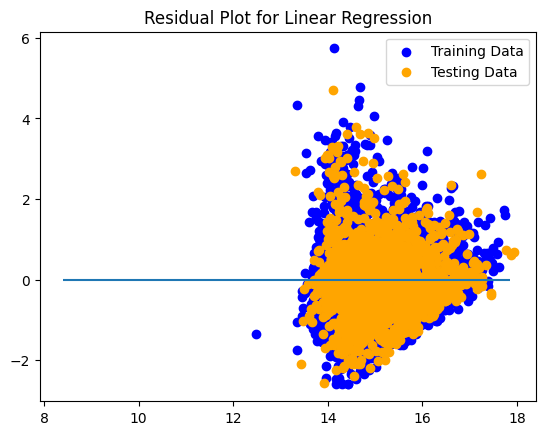

In [9]:
plt.scatter(regressor.predict(X_train), regressor.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(regressor.predict(X_test), regressor.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot for Linear Regression")
plt.savefig('LinearRegression.png', dpi=256)

In [10]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import SGDRegressor
from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt

parameters = {
                'alpha': sp_randFloat(0.00001, 0.001),
                'max_iter': sp_randInt(500, 1500),
                'learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive'],
                'eta0': sp_randFloat(0.001,0.1)
            }
model = SGDRegressor()
randm_src = RandomizedSearchCV(estimator=model, param_distributions = parameters, cv=2, n_iter = 10, n_jobs=-1)
randm_src.fit(X_train, y_train.values.reshape((-1,)))
print(" Results from Random Search " )
print("\n The best estimator across ALL searched params:\n", randm_src.best_estimator_)
print("\n The best score across ALL searched params:\n", randm_src.best_score_)
print("\n The best parameters across ALL searched params:\n", randm_src.best_params_)

 Results from Random Search 

 The best estimator across ALL searched params:
 SGDRegressor(alpha=0.0001092422099740724, eta0=0.043522089648042245,
             learning_rate='adaptive', max_iter=1442)

 The best score across ALL searched params:
 -3.514434602637863e+22

 The best parameters across ALL searched params:
 {'alpha': 0.0001092422099740724, 'eta0': 0.043522089648042245, 'learning_rate': 'adaptive', 'max_iter': 1442}


In [11]:
sgdregressor = SGDRegressor(alpha=randm_src.best_params_['alpha'], max_iter=randm_src.best_params_['max_iter'],
                            learning_rate=randm_src.best_params_['learning_rate'], eta0=randm_src.best_params_['eta0'])
# sgdregressor = SGDRegressor()
sgdregressor.fit(X_train, y_train.values.reshape((-1,)))  
y_pred_sgd = sgdregressor.predict(X_test)

In [12]:
MSE_sgd = mean_squared_error(y_test, y_pred_sgd)
r2_sgd = r2_score(y_test, y_pred_sgd)

print(f"MSE: {MSE_sgd}, R2: {r2_sgd}")

MSE: 3.480624099530483e+22, R2: -2.7106487591987495e+22


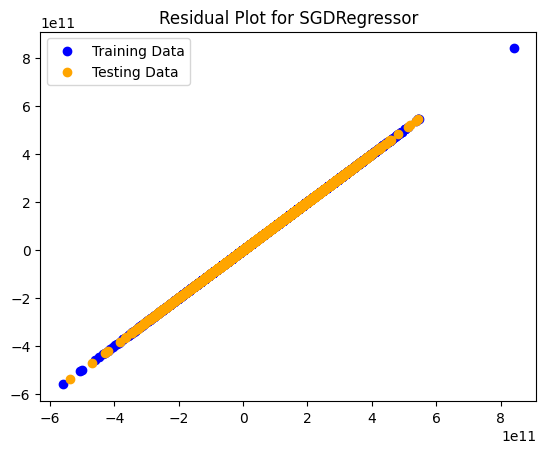

In [13]:
plt.scatter(sgdregressor.predict(X_train), sgdregressor.predict(X_train) - y_train.values.reshape((-1,)), c="blue", label="Training Data")
plt.scatter(sgdregressor.predict(X_test), sgdregressor.predict(X_test) - y_test.values.reshape((-1,)), c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot for SGDRegressor")
plt.savefig('SGDRegressor.png', dpi=256)

In [14]:
from sklearn.linear_model import Lasso

parameters = {
                'alpha': sp_randFloat(0, 10)
             }
model = Lasso()
randm_src_lasso = RandomizedSearchCV(estimator=model, param_distributions = parameters, cv=2, n_iter = 10, n_jobs=-1)
randm_src_lasso.fit(X_train, y_train)
print("\n The best parameters across ALL searched params:\n", randm_src_lasso.best_params_)

lassoregressor = Lasso(alpha=randm_src_lasso.best_params_['alpha'])
lassoregressor.fit(X_train, y_train)  
y_pred_lasso = lassoregressor.predict(X_test)

MSE_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print(f"MSE: {MSE_lasso}, R2: {r2_lasso}")


 The best parameters across ALL searched params:
 {'alpha': 2.003715403525035}
MSE: 0.7998393192354464, R2: 0.3770992223675066


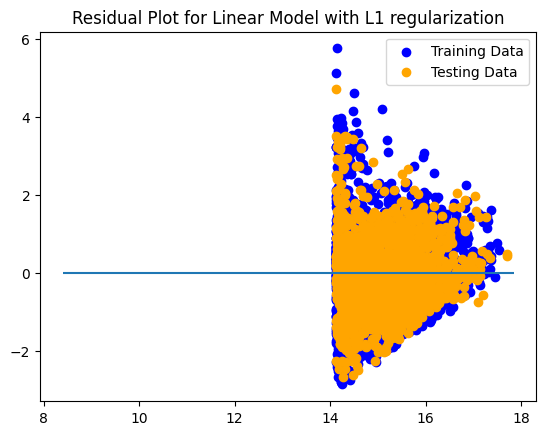

In [15]:
plt.scatter(lassoregressor.predict(X_train), lassoregressor.predict(X_train) - y_train.values.reshape((-1,)), c="blue", label="Training Data")
plt.scatter(lassoregressor.predict(X_test), lassoregressor.predict(X_test) - y_test.values.reshape((-1,)), c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot for Linear Model with L1 regularization")
plt.savefig('LinearRegression_L1.png', dpi=256)

In [16]:
from sklearn.linear_model import Ridge

parameters = {
                'alpha': sp_randFloat(0, 10)
             }
model = Ridge()
randm_src_ridge = RandomizedSearchCV(estimator=model, param_distributions = parameters, cv=2, n_iter = 10, n_jobs=-1)
randm_src_ridge.fit(X_train, y_train)
print("\n The best parameters across ALL searched params:\n", randm_src_ridge.best_params_)

ridgeregressor = Ridge(alpha=randm_src_ridge.best_params_['alpha'])
ridgeregressor.fit(X_train, y_train)  
y_pred_ridge = ridgeregressor.predict(X_test)

MSE_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f"MSE: {MSE_ridge}, R2: {r2_ridge}")


 The best parameters across ALL searched params:
 {'alpha': 7.437661237062163}
MSE: 0.7355007074869961, R2: 0.4272050002732656


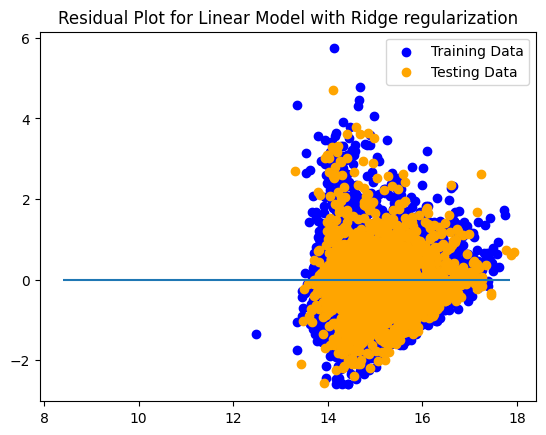

In [17]:
plt.scatter(ridgeregressor.predict(X_train), ridgeregressor.predict(X_train) - y_train.values, c="blue", label="Training Data")
plt.scatter(ridgeregressor.predict(X_test), ridgeregressor.predict(X_test) - y_test.values, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot for Linear Model with Ridge regularization")
plt.savefig('LinearRegression_Ridge.png', dpi=256)

In [18]:
from sklearn.linear_model import LassoCV

lassocvregressor = LassoCV()
lassocvregressor.fit(X_train, y_train)  
y_pred_lassocv = lassocvregressor.predict(X_test)

MSE_lassocv = mean_squared_error(y_test, y_pred_lassocv)
r2_lassocv = r2_score(y_test, y_pred_lassocv)

print(f"MSE: {MSE_lassocv}, R2: {r2_lassocv}")

MSE: 0.7678163619966389, R2: 0.4020381375801425


/opt/homebrew/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:1561: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


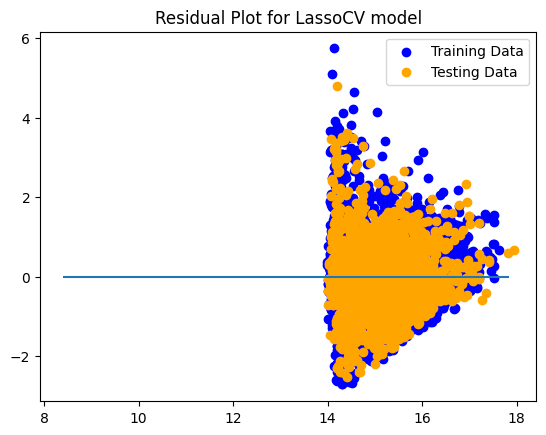

In [19]:
plt.scatter(lassocvregressor.predict(X_train), lassocvregressor.predict(X_train) - y_train.values.reshape((-1,)), c="blue", label="Training Data")
plt.scatter(lassocvregressor.predict(X_test), lassocvregressor.predict(X_test) - y_test.values.reshape((-1,)), c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot for LassoCV model")
plt.savefig('LassoCV.png', dpi=256)